In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
target = ['Survived']

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
# Change sex column to float
df['Sex'] = df.apply( lambda row: int(row['Sex']=='male'), axis=1)

In [22]:
df = df.dropna(subset = features+target)
x_train, x_temp, y_train, y_temp = train_test_split(df[features], df[target],
                                                    test_size=0.4, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp,
                                                test_size=0.5, random_state=0)
#train validation test split

In [23]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
tree.score(x_val, y_val)

0.6923076923076923

In [28]:
tree.score(x_train, y_train) #This tree is heavily over fit

0.9906542056074766

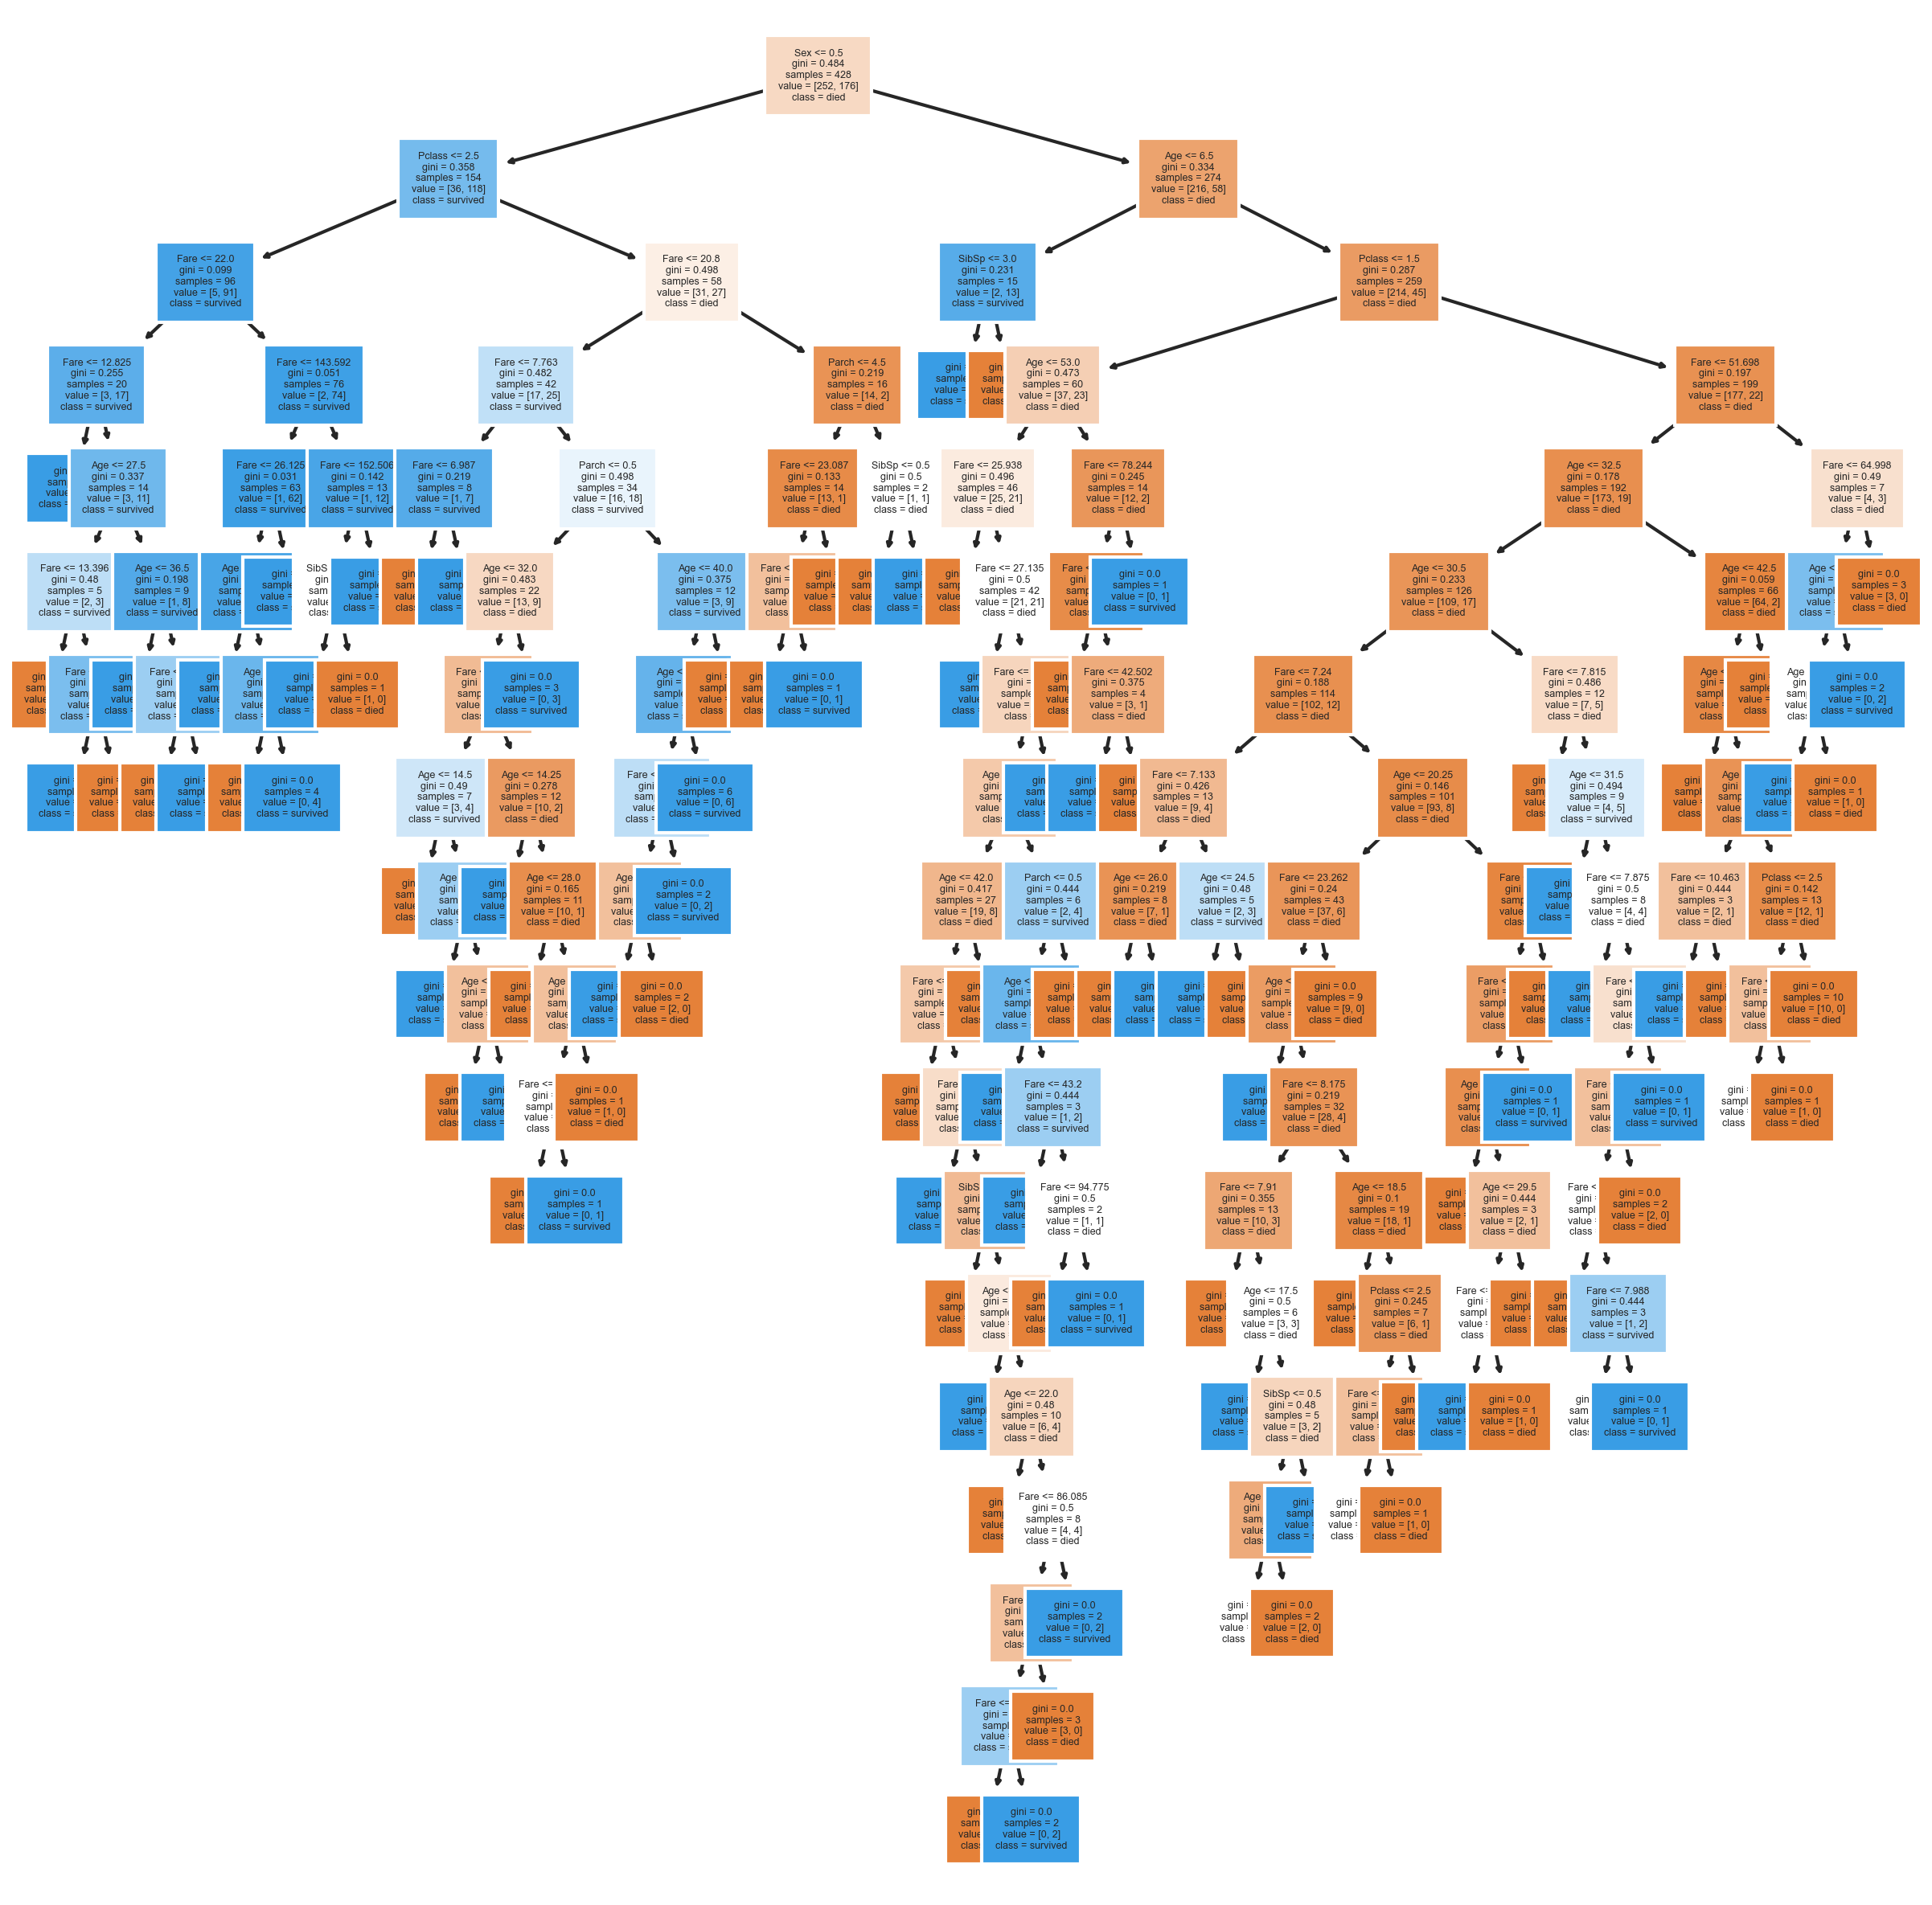

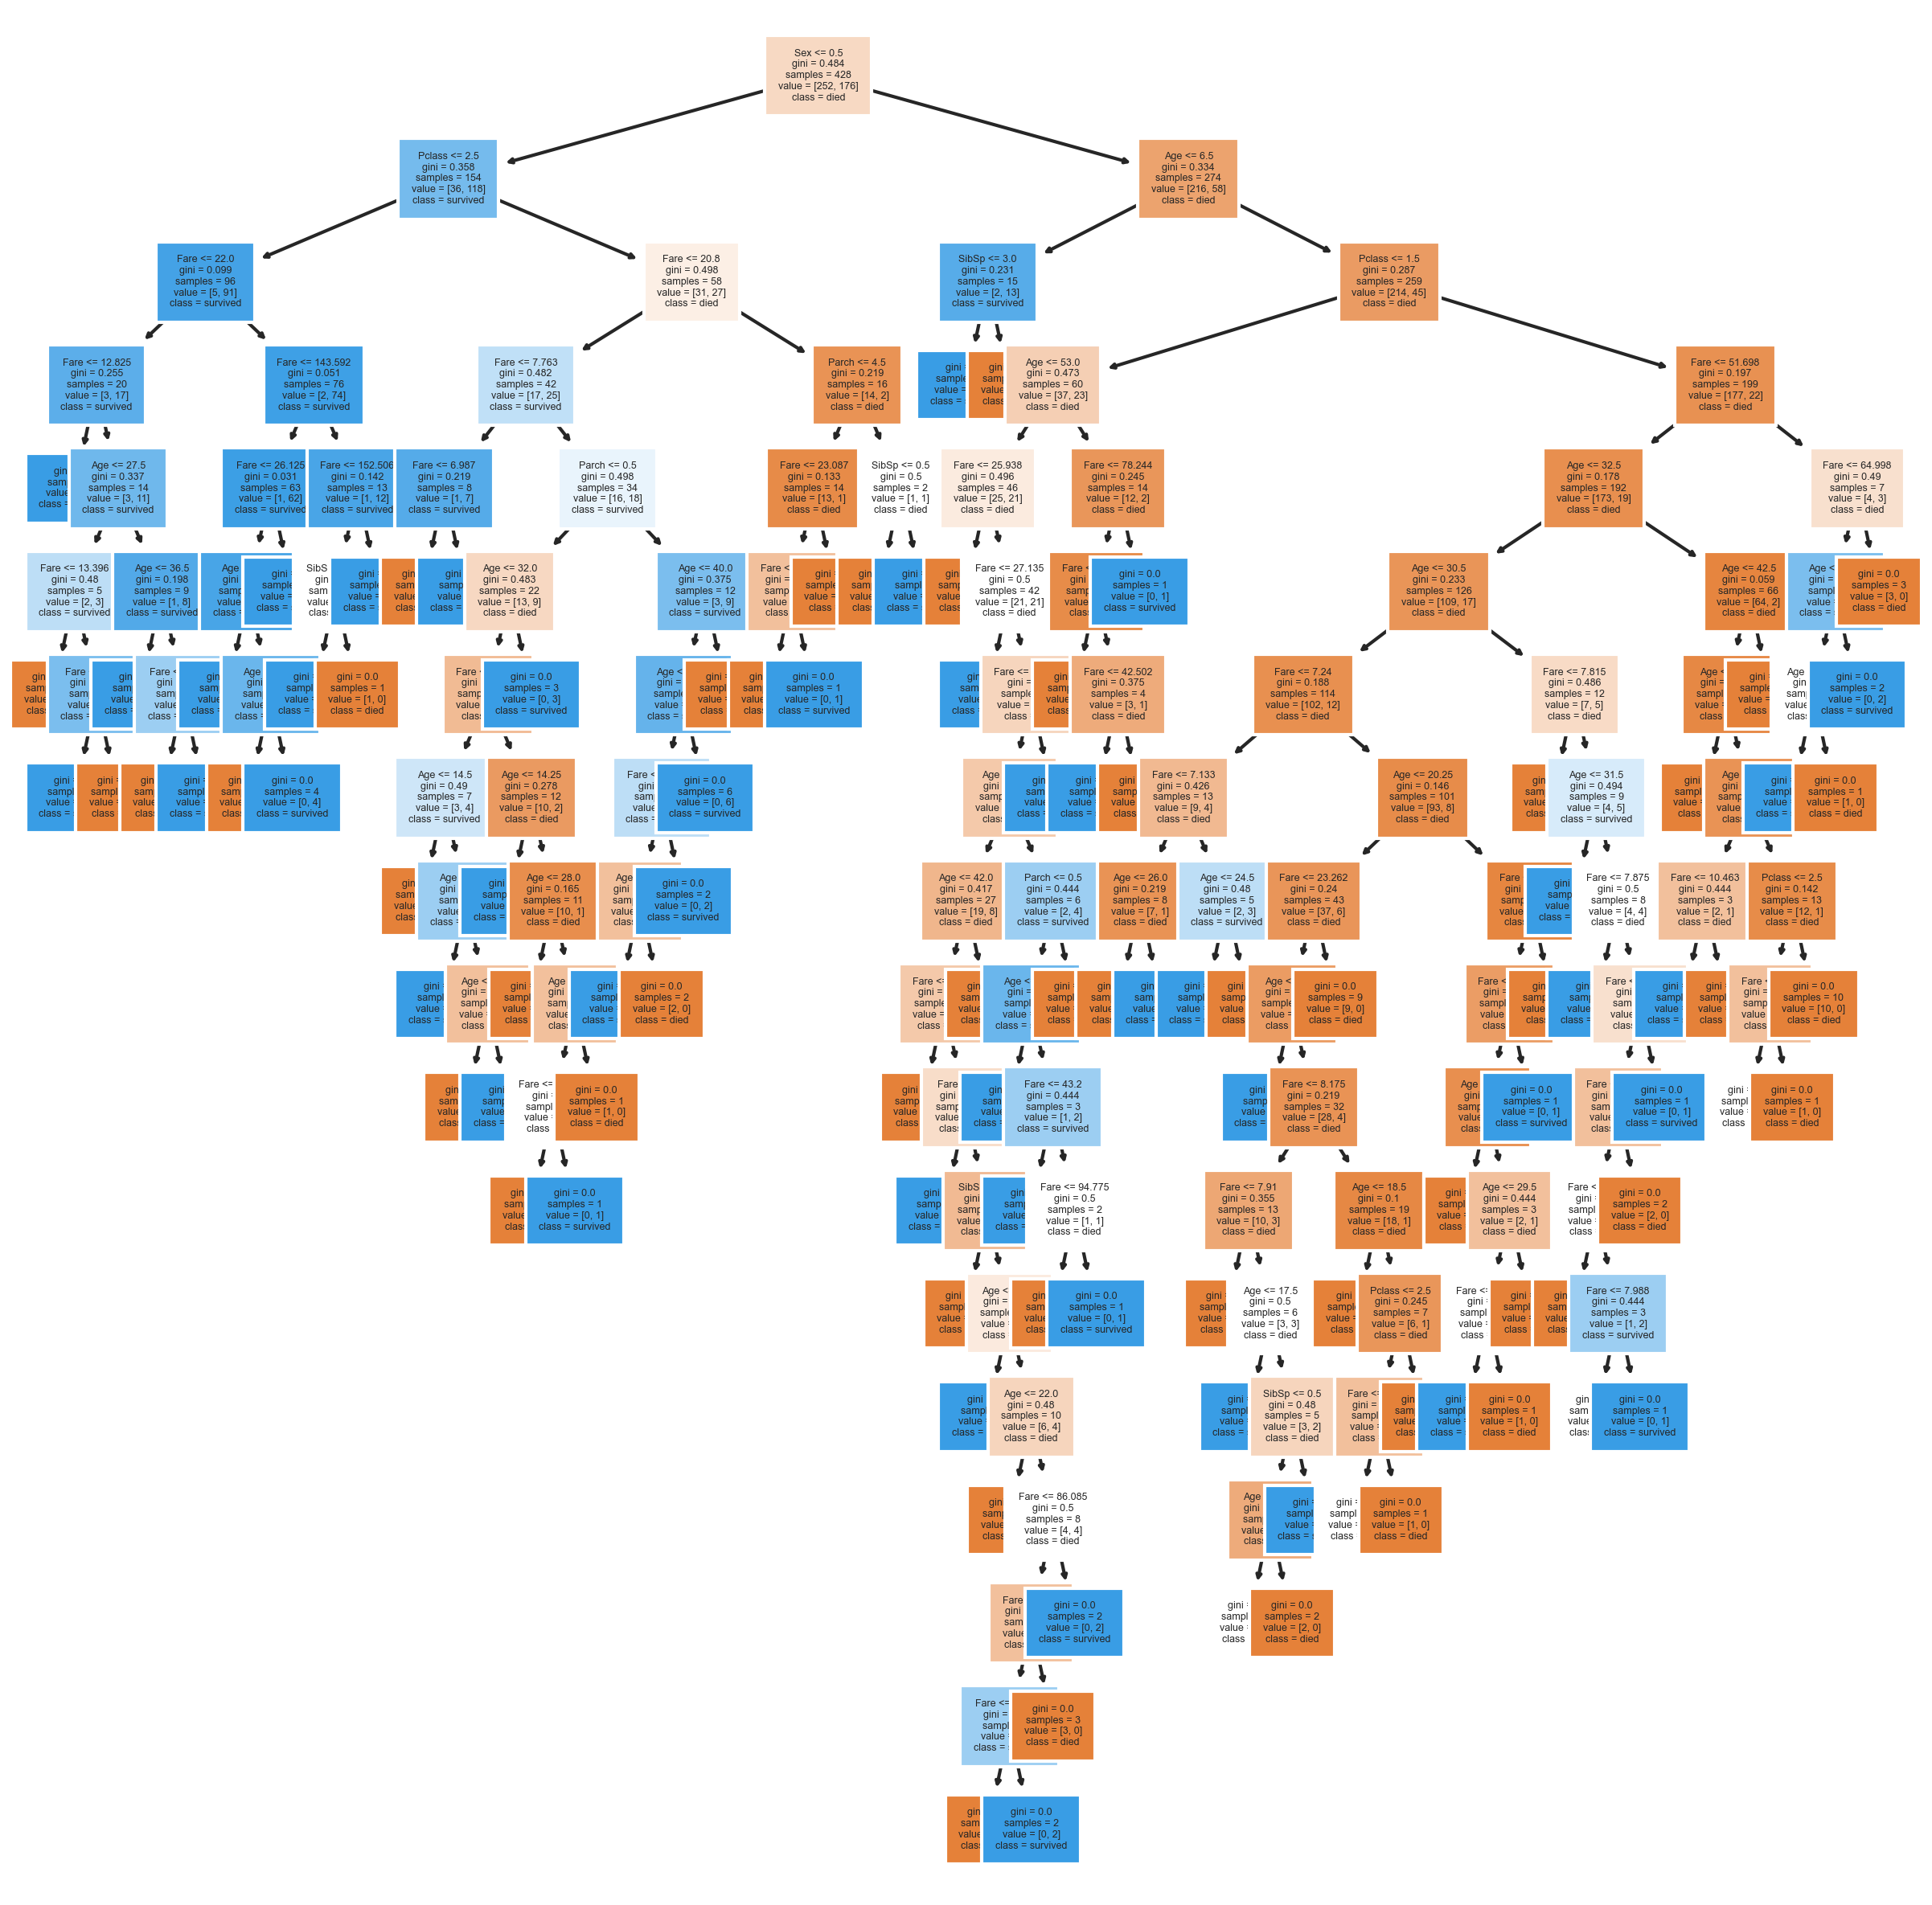

In [35]:
fig, ax = plt.subplots(figsize = (10,10), dpi=300)
plot_tree(tree, feature_names = features, class_names = ['died' , 'survived'],
          filled=True, fontsize=3);